# Makine Öğrenimi Dersi
# Diyabet Hastalığı Tahmini Projesi

#### Proje Danışmanı
* **Dr. Öğretim Üyesi Yavuz Canbay**

#### Hazırlayanlar
* **Kübra Karsavuran 18110131058**
* **Ahmet Yılmaz 20110131074**

## İçindekiler
1.  [İçerik](#a)
2.  [Öz Nitelik Bilgileri](#b)
3.  [Veri Analiz İçeriği](#c)
4.  [Modelleme](#d)

## 1.İçerik<a id='a'></a>
Bu veri seti aslen Ulusal Diyabet ve Sindirim ve Böbrek Hastalıkları Enstitüsü'nden alınmıştır. Amaç, bir hastanın diyabetli olup olmadığını tanısal ölçümlere dayanarak tahmin etmektir. **Lojistik Regresyon**, **Destek Vektör Makineleri(SVM)** ,**Gaussian Naive Bayes**, **KNN**, **Yapay Sinir Ağları** ve **Random Forest** algoritmaları ile sınıflandırma gerçekleştirilecek bu algoritmaların sonuçları karşılaştırılacaktır. Bu veri setinde hedeflenen bağımlı değişkenimiz bir kategorik değişkendir amacımız yeni gelen gözlem birimi geldiğinden bağımsız gözlem değişkenleri gözlendiğinde kategorik değişkenin yani çıktı sınıfının 1 veya 0 sınıfının gerçekleşme olasılığı ile ilgileneceğiz.

## Diyabet Hastalığı Nedir ?
![diyabet](./images/diyabet.png)

İnsan vücudunun enerji ihtiyacı; alınan besinlerdeki karbonhidrat, protein ve yağlardan sağlanır. Bu besin öğeleri sindirilirken **glikoz** adı verilen basit şekerler açığa çıkar. Glikoz vücudun tüm organları için en önemli besin kaynağıdır. Hücrelerin glikozun enerjisini kullanabilmesi için, glikozun hücre içine alınması gerekir. Glikozun hücre içine girmesini ve glikojen olarak depolanmasını sağlayan, pankreas bezi tarafından salgılanan **insülin** hormonudur. 

Şeker hastalığı ya da diyabet (Diabetes Mellitus), pankreasın vücut için yeterli miktarda insülin üretememesi ya da ürettiği insülinin vücut tarafından etkili bir şekilde kullanılamaması sonucunda ortaya çıkan, yüksek kan şekeri ile seyreden bir hastalıktır.

## 2.Öz Nitelik Bilgileri<a id='b'></a>

* **Pregnancies(gebelikler):** Hamile kalma sayısı
* **Glucose(glikoz):** Plazma glikoz konsantrasyonu, bir oral glikoz tolerans testinde 2 saat
* **BloodPressure(tansiyon):** Diyastolik kan basıncı (mm Hg)
* **SkinThickness:** Triceps deri kıvrım kalınlığı (mm)
* **Insulin(insülin):** 2 saatlik serum insülini (mu U/ml)
* **BMI:** Vücut kitle indeksi (kg cinsinden ağırlık/(m cinsinden boy)^2)
* **DiabetesPedigreeFunction(DPF):** Diyabet soyağacı işlevi 
* **Age(yas):** Yaş (yıl)
* **Outcome(sonuc):** Sınıf değişkeni (0 veya 1)

## 3.Analiz İçeriği<a id='c'></a>
1. [Python Kütüphaneler](#1)
1. [Veri Ekleme ve Ön Bakış](#2)
1. [Kayıp Veri ve Benzersiz Değer Analizi](#3)
    1. Eksik veri doldurma
1. [Sayısal Özellik Analizi](#4)
1. [Standardizasyon](#5)
1. [Box Plot Analizi](#6)
1. [Swarm Analizi](#7)
1. [Korelasyon Analizi](#8)
1. [Ayrık Değer Tespiti](#9)

## 3.1.Python Kütüphaneler<a id='1'></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle # modeli kaydediyor.

from time import time

from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz


from sklearn import linear_model
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

## 3.2.Veri Ekleme ve Ön Bakış <a id='2'></a> 

In [2]:
df=pd.read_csv("diabetes.csv")#data setini df isimli değişkene atadık

In [3]:
df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})
# veri setimizin ilk 5 verisini ekrana getirdik.

In [4]:
df.info() # veri setimiz hakkında bilgileri görüntüledik. 
#hiç eksik verimizin olmadığını, sayısını ve veri tipi bilgilerini görüntüledik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape # veri setimizin boyutunu görüntüledik 768 adet satır 9 adet sütundan oluşuyor.

(768, 9)

In [6]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()
#ploty kütüphanesi ile çıktı etiketimizin görüntülenmesi yapıldı.

In [7]:
df.columns=["gebelikler","glikoz","tansiyon","triceps_deri","insulin","BMI",
           "DPF","yas","sonuc"]
#veri setimizdeki öz nitelikleri türkçeleştirdik.

In [8]:
df #veri setimizi görüntüledik.

gebelikler  glikoz  tansiyon  triceps_deri  insulin   BMI    DPF  yas  \
0             6     148        72            35        0  33.6  0.627   50   
1             1      85        66            29        0  26.6  0.351   31   
2             8     183        64             0        0  23.3  0.672   32   
3             1      89        66            23       94  28.1  0.167   21   
4             0     137        40            35      168  43.1  2.288   33   
..          ...     ...       ...           ...      ...   ...    ...  ...   
763          10     101        76            48      180  32.9  0.171   63   
764           2     122        70            27        0  36.8  0.340   27   
765           5     121        72            23      112  26.2  0.245   30   
766           1     126        60             0        0  30.1  0.349   47   
767           1      93        70            31        0  30.4  0.315   23   

     sonuc  
0        1  
1        0  
2        1  
3        0  
4        1  
..     ...  
763      0  
764      0  
765      0  
766      1  
767      0  

[768 rows x 9 columns]

In [9]:
df.dtypes # veri setimizdeki özniteliklerin veri tiplerini görüntüledik.

gebelikler        int64
glikoz            int64
tansiyon          int64
triceps_deri      int64
insulin           int64
BMI             float64
DPF             float64
yas               int64
sonuc             int64
dtype: object

* **Kategorik Veri Kontrolünü yaptık.**
* **Çıktı etiketi hariç, özniteliklerde kategorik özelliği oluşturabilecek veriler bulunmamaktadır.**
* **Kategorik özniteliklerin özelliklerinden bir diğeri ise veri tipinin object olmasıdır.**

## 3.3. Kayıp Veri ve Benzersiz Değer Analizi <a id='3'></a>

<a id=''></a>
### 3.3.1. Eksik veri doldurma

In [10]:
df.isnull() # veri setimizde eksik veri var mı yok mu onun kontrolü gerçekleştirildi.

gebelikler  glikoz  tansiyon  triceps_deri  insulin    BMI    DPF    yas  \
0         False   False     False         False    False  False  False  False   
1         False   False     False         False    False  False  False  False   
2         False   False     False         False    False  False  False  False   
3         False   False     False         False    False  False  False  False   
4         False   False     False         False    False  False  False  False   
..          ...     ...       ...           ...      ...    ...    ...    ...   
763       False   False     False         False    False  False  False  False   
764       False   False     False         False    False  False  False  False   
765       False   False     False         False    False  False  False  False   
766       False   False     False         False    False  False  False  False   
767       False   False     False         False    False  False  False  False   

     sonuc  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
763  False  
764  False  
765  False  
766  False  
767  False  

[768 rows x 9 columns]

<AxesSubplot:>

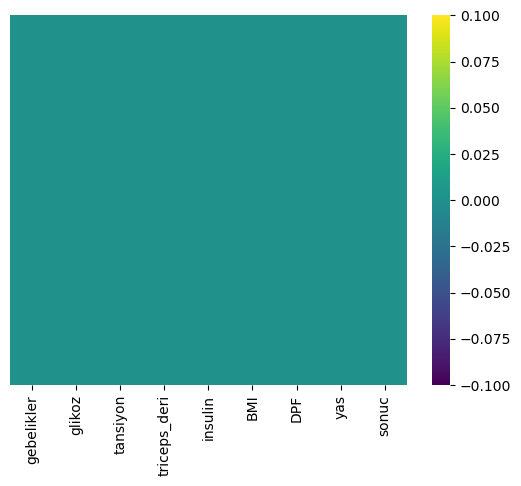

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis") # eksik veri kontrolünün görselleştirilmesi yapıldı.

In [12]:
df.eq(0).sum()# eksik veri kontrolünde özniteliklerde 0 olan verilerin sayısını gösteriyor.

gebelikler      111
glikoz            5
tansiyon         35
triceps_deri    227
insulin         374
BMI              11
DPF               0
yas               0
sonuc           500
dtype: int64

**Aşağıdaki Kod satırında sıfır olan değerleri düzeltiyoruz.**

In [13]:
df [["glikoz","tansiyon","triceps_deri","insulin","BMI","DPF","yas",]]=df [["glikoz","tansiyon","triceps_deri","insulin","BMI","DPF","yas"]].replace(0,np.NaN)

**Eksik verilerin ortalama ile doldurulması**

In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
df.head()

gebelikler  glikoz  tansiyon  triceps_deri     insulin   BMI    DPF  yas  \
0           6   148.0      72.0      35.00000  155.548223  33.6  0.627   50   
1           1    85.0      66.0      29.00000  155.548223  26.6  0.351   31   
2           8   183.0      64.0      29.15342  155.548223  23.3  0.672   32   
3           1    89.0      66.0      23.00000   94.000000  28.1  0.167   21   
4           0   137.0      40.0      35.00000  168.000000  43.1  2.288   33   

   sonuc  
0      1  
1      0  
2      1  
3      0  
4      1

In [16]:
df.isnull().sum() #sum fonksiyonu ile istenilen işlemin toplam değerleri gösterilir.

gebelikler      0
glikoz          0
tansiyon        0
triceps_deri    0
insulin         0
BMI             0
DPF             0
yas             0
sonuc           0
dtype: int64

In [17]:
df.eq(0).sum()

gebelikler      111
glikoz            0
tansiyon          0
triceps_deri      0
insulin           0
BMI               0
DPF               0
yas               0
sonuc           500
dtype: int64

## 3.4.Sayısal Özellik Analizi<a id='4'></a>

In [18]:
numeric_list=["gebelikler","glikoz","tansiyon","triceps_deri","insulin","BMI","DPF","yas","sonuc"]
numeric_list
#veri setimizin tamamı numeric değerlerden oluştuğundan bunları ileride modelleme 
#işlemlerimizde kullanmak üzer array içerisine aldık. 

['gebelikler',
 'glikoz',
 'tansiyon',
 'triceps_deri',
 'insulin',
 'BMI',
 'DPF',
 'yas',
 'sonuc']

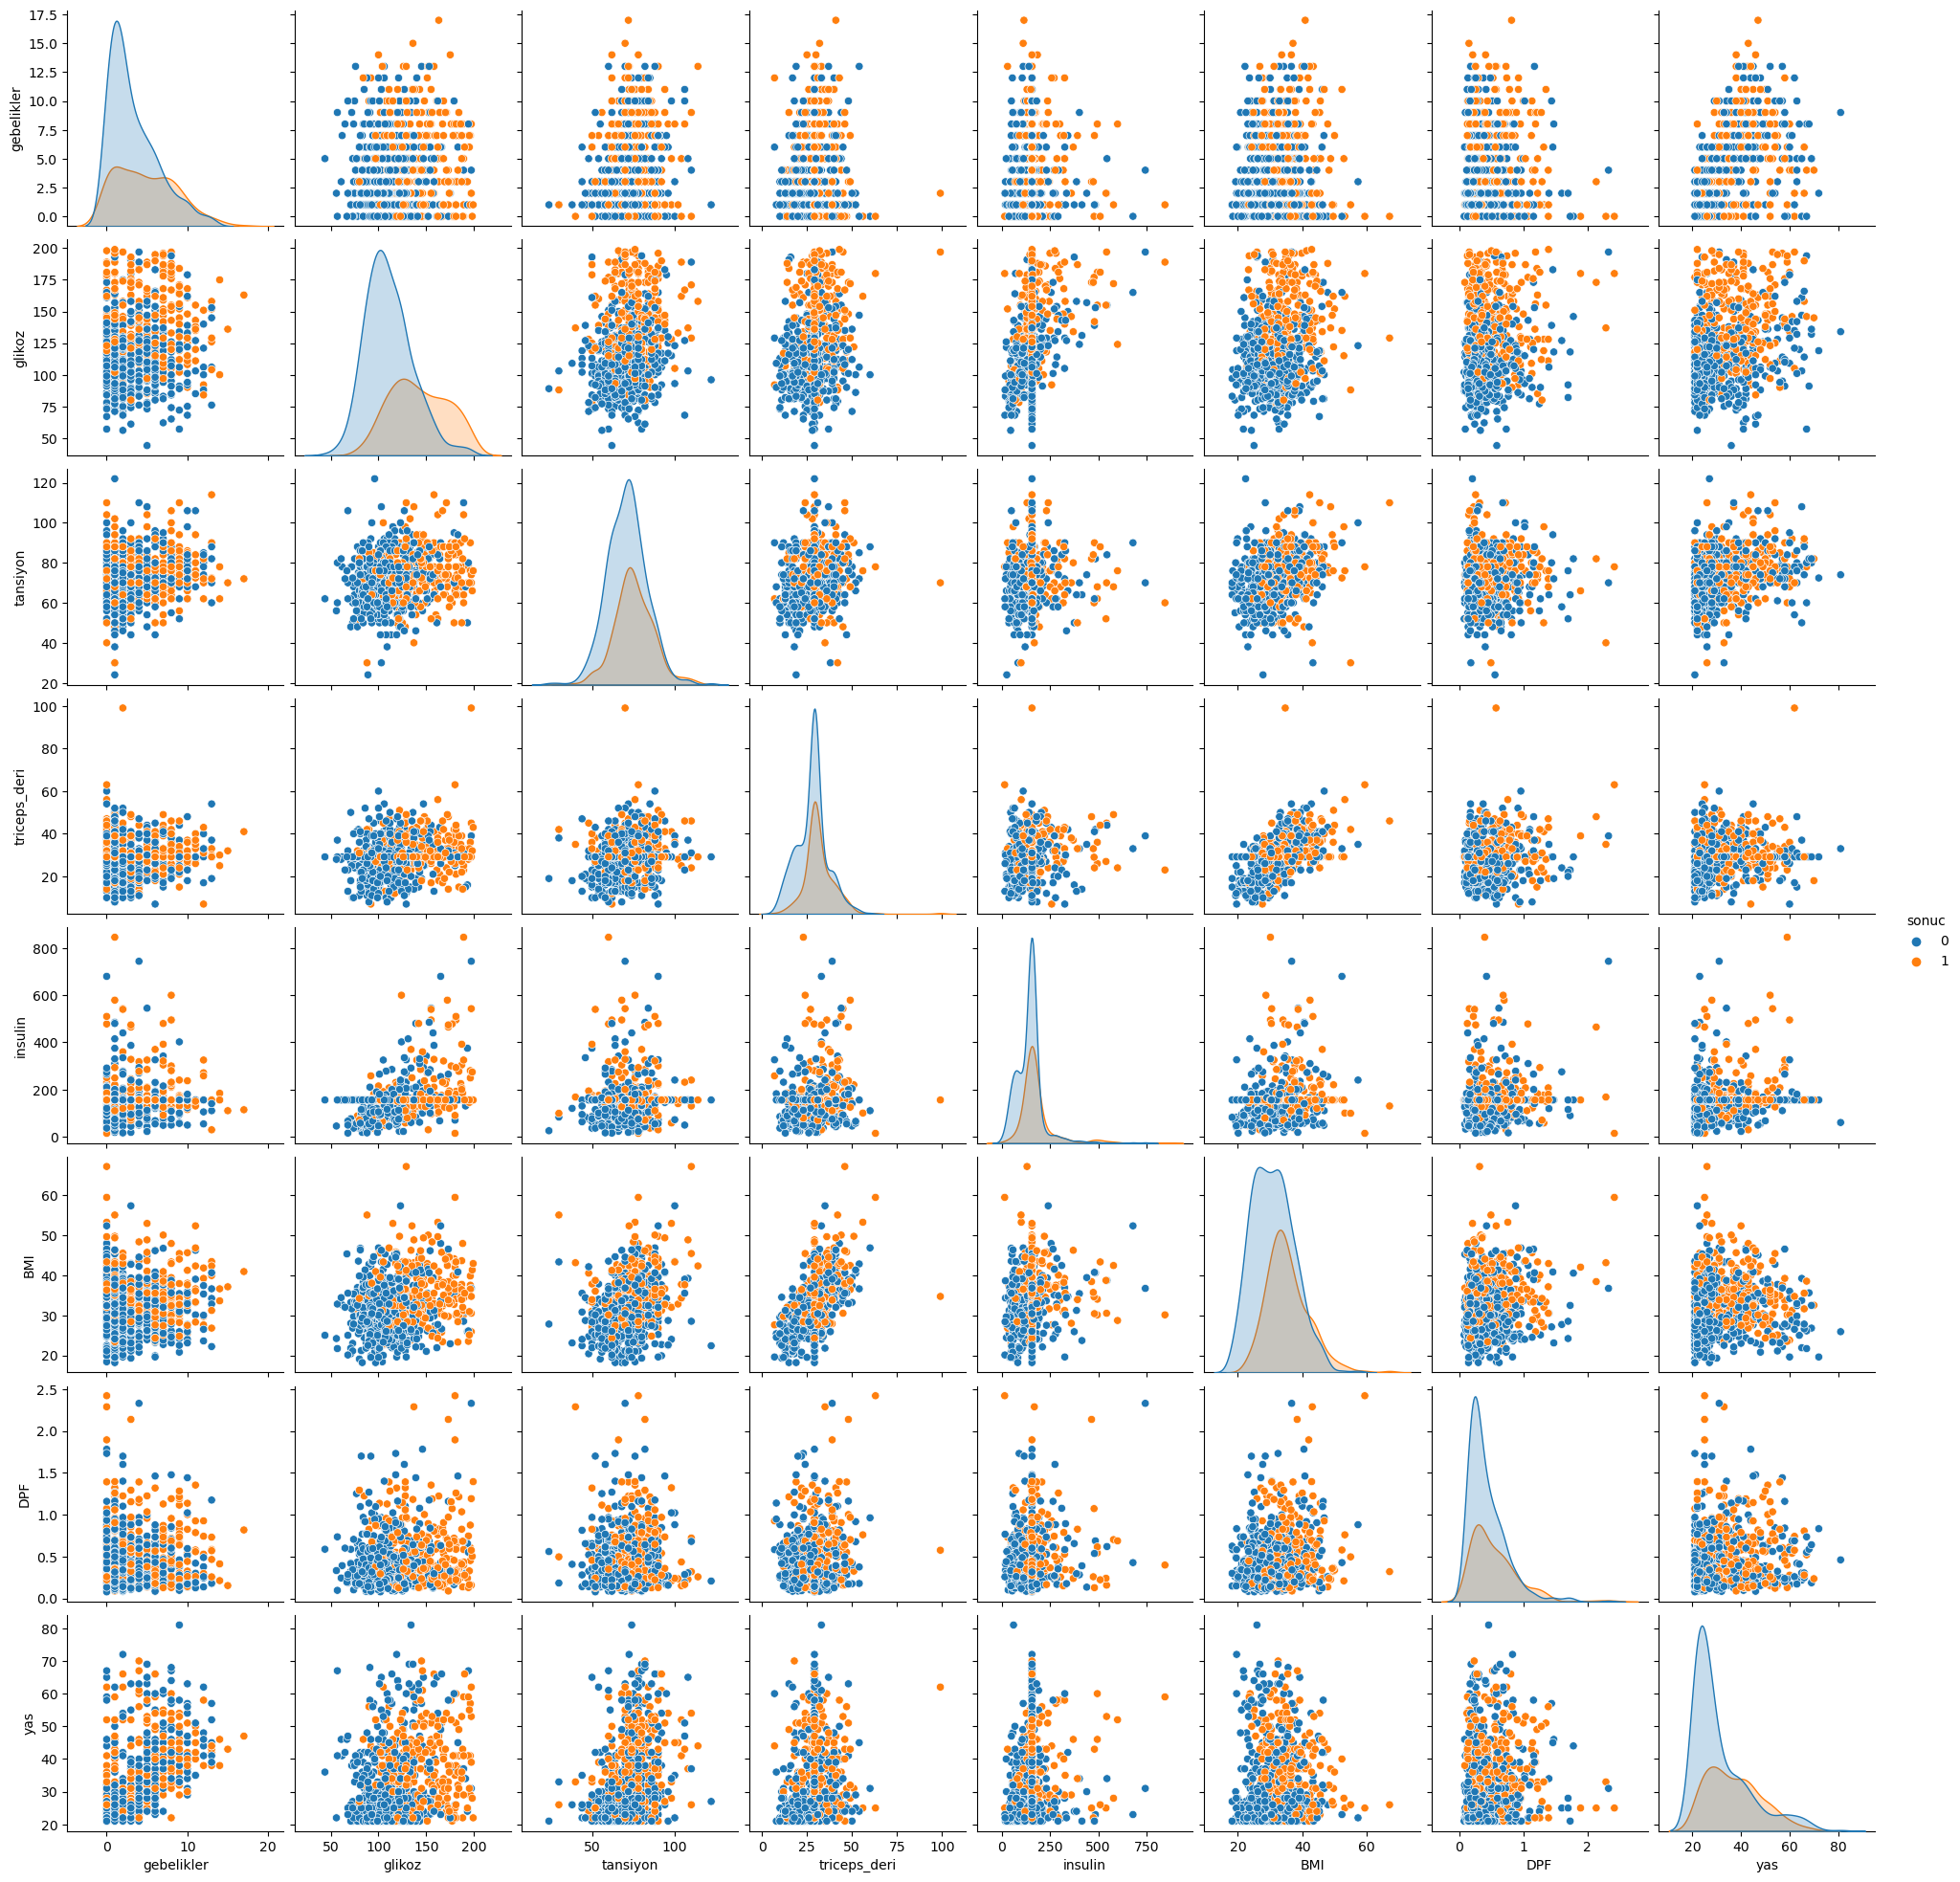

In [19]:
df_numeric=df.loc[:,numeric_list] # numeric_list dizisinin hepsini kapsa dedik.
sns.pairplot(df_numeric,hue="sonuc",diag_kind="kde")# hue ile sonuc isimli çıktı etiketine göre görselleştirme yaptık.
plt.show()

## 3.5. Standardizasyon <a id='5'></a>

In [20]:
# analizler için gerekli ve ml algoritmasının daha iyi eğitilmesinde yardımcı oluyor.

In [21]:
scaler=StandardScaler()# Sckitlearn kütüphanesindeki StandardScaler fonksiyonunu bir değişkene atadık.

In [22]:
scaled_array=scaler.fit_transform(df[numeric_list[:-1]])
# veri setimizde ki numeric_list isimli dizimizde son öznitelik hariç hepsini kapsa dedik
# yani sonuc çıktı etiketini almadık ve bu listeyi fit işlemine tabi tuttuk.
scaled_array

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [23]:
pd.DataFrame(scaled_array).describe()
# std standart sapmadır ve bu değerler 1 olduğunda standardizasyon işlemimiz başarılı demektir.

0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.544261e-17 -3.301757e-16  6.966722e-16  6.866252e-16 -2.352033e-16   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.554131e+00 -4.004245e+00 -2.521670e+00 -1.665945e+00   
25%   -8.448851e-01 -7.212214e-01 -6.953060e-01 -4.727737e-01 -4.007289e-01   
50%   -2.509521e-01 -1.540881e-01 -1.675912e-02  8.087936e-16 -3.345079e-16   
75%    6.399473e-01  6.103090e-01  6.282695e-01  3.240194e-01 -3.345079e-16   
max    3.906578e+00  2.541850e+00  4.102655e+00  7.950467e+00  8.126238e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   3.090699e-16  2.462585e-16  1.857600e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -2.075119e+00 -1.189553e+00 -1.041549e+00  
25%   -7.215397e-01 -6.889685e-01 -7.862862e-01  
50%   -8.363615e-03 -3.001282e-01 -3.608474e-01  
75%    6.029301e-01  4.662269e-01  6.602056e-01  
max    5.042087e+00  5.883565e+00  4.063716e+00

## 3.6. Box Plot Analizi <a id='6'></a>

In [24]:
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy.head()
#standardizasyon edilmiş array ile numerik listeyi bir dataframe haline getirdik ve değiken içerisine atadık.

gebelikler    glikoz  tansiyon  triceps_deri       insulin       BMI  \
0    0.639947  0.865108 -0.033518  6.655021e-01 -3.345079e-16  0.166292   
1   -0.844885 -1.206162 -0.529859 -1.746338e-02 -3.345079e-16 -0.852531   
2    1.233880  2.015813 -0.695306  8.087936e-16 -3.345079e-16 -1.332833   
3   -0.844885 -1.074652 -0.529859 -7.004289e-01 -7.243887e-01 -0.634212   
4   -1.141852  0.503458 -2.680669  6.655021e-01  1.465506e-01  1.548980   

        DPF       yas  
0  0.468492  1.425995  
1 -0.365061 -0.190672  
2  0.604397 -0.105584  
3 -0.920763 -1.041549  
4  5.484909 -0.020496

In [25]:
df_dummy=pd.concat([df_dummy,df.loc[:,"sonuc"]],axis=1)
df_dummy.head()
#axis 1 yanyana demek
#datasetimizdeki çıktı sınıfı ile dummy dataframeni birleştirdik

gebelikler    glikoz  tansiyon  triceps_deri       insulin       BMI  \
0    0.639947  0.865108 -0.033518  6.655021e-01 -3.345079e-16  0.166292   
1   -0.844885 -1.206162 -0.529859 -1.746338e-02 -3.345079e-16 -0.852531   
2    1.233880  2.015813 -0.695306  8.087936e-16 -3.345079e-16 -1.332833   
3   -0.844885 -1.074652 -0.529859 -7.004289e-01 -7.243887e-01 -0.634212   
4   -1.141852  0.503458 -2.680669  6.655021e-01  1.465506e-01  1.548980   

        DPF       yas  sonuc  
0  0.468492  1.425995      1  
1 -0.365061 -0.190672      0  
2  0.604397 -0.105584      1  
3 -0.920763 -1.041549      0  
4  5.484909 -0.020496      1

In [26]:
data_melted = pd.melt(df_dummy, id_vars ="sonuc", var_name = "features", value_name = "value")
data_melted.head(1000)
#melted işlemi gerçekleştirdik.
# Bu melted işlemi dataframe şeklini değiştiriyor. 

sonuc    features     value
0        1  gebelikler  0.639947
1        0  gebelikler -0.844885
2        1  gebelikler  1.233880
3        0  gebelikler -0.844885
4        1  gebelikler -1.141852
..     ...         ...       ...
995      1      glikoz  1.325390
996      0      glikoz  2.476096
997      0      glikoz -0.154088
998      1      glikoz  0.667844
999      1      glikoz  0.404826

[1000 rows x 3 columns]

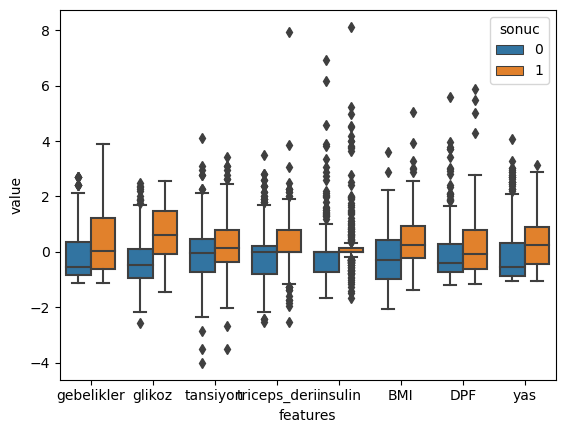

In [27]:
plt.figure()
sns.boxplot(x="features",y="value",hue="sonuc",data=data_melted)
plt.show()

## 3.7. Swarm Analizi <a id='7'></a>

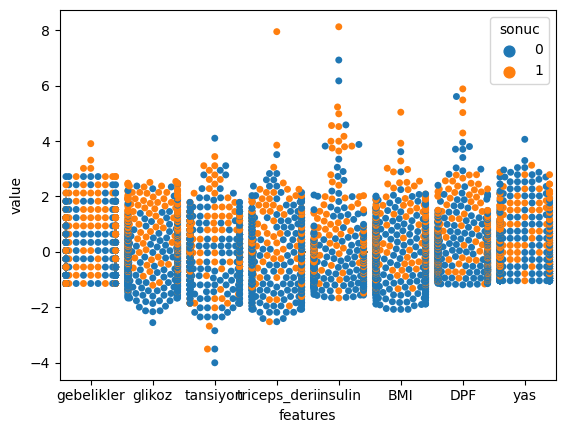

In [28]:
plt.figure()
sns.swarmplot(x="features",y="value", hue="sonuc",data=data_melted)
plt.show()
#her sample göre gösterim sağlanıyor.

## 3.8. Korelason Analizi <a id='8'></a>

In [29]:
df.corr()
#eğer özellikler arasındaki değerler 1 ise doğru orantılı -1 ise ters orantılı 0 ise ilişki yoktur demektir.

gebelikler    glikoz  tansiyon  triceps_deri   insulin  \
gebelikler      1.000000  0.127911  0.208522      0.082989  0.056027   
glikoz          0.127911  1.000000  0.218367      0.192991  0.420157   
tansiyon        0.208522  0.218367  1.000000      0.192816  0.072517   
triceps_deri    0.082989  0.192991  0.192816      1.000000  0.158139   
insulin         0.056027  0.420157  0.072517      0.158139  1.000000   
BMI             0.021565  0.230941  0.281268      0.542398  0.166586   
DPF            -0.033523  0.137060 -0.002763      0.100966  0.098634   
yas             0.544341  0.266534  0.324595      0.127872  0.136734   
sonuc           0.221898  0.492928  0.166074      0.215299  0.214411   

                   BMI       DPF       yas     sonuc  
gebelikler    0.021565 -0.033523  0.544341  0.221898  
glikoz        0.230941  0.137060  0.266534  0.492928  
tansiyon      0.281268 -0.002763  0.324595  0.166074  
triceps_deri  0.542398  0.100966  0.127872  0.215299  
insulin       0.166586  0.098634  0.136734  0.214411  
BMI           1.000000  0.153400  0.025519  0.311924  
DPF           0.153400  1.000000  0.033561  0.173844  
yas           0.025519  0.033561  1.000000  0.238356  
sonuc         0.311924  0.173844  0.238356  1.000000

Korelasyon analizi ile hangi değişkenler birbirleriyle ne kadar ilişkide onu görüyoruz. İki özellik arasındaki korelasyonun yüksek olmaması gerkiyor çıktıdaki korelasyonun yüksek olması bekleniyor yani çıktıya etki derecesinin yüksek olması bekleniyor.

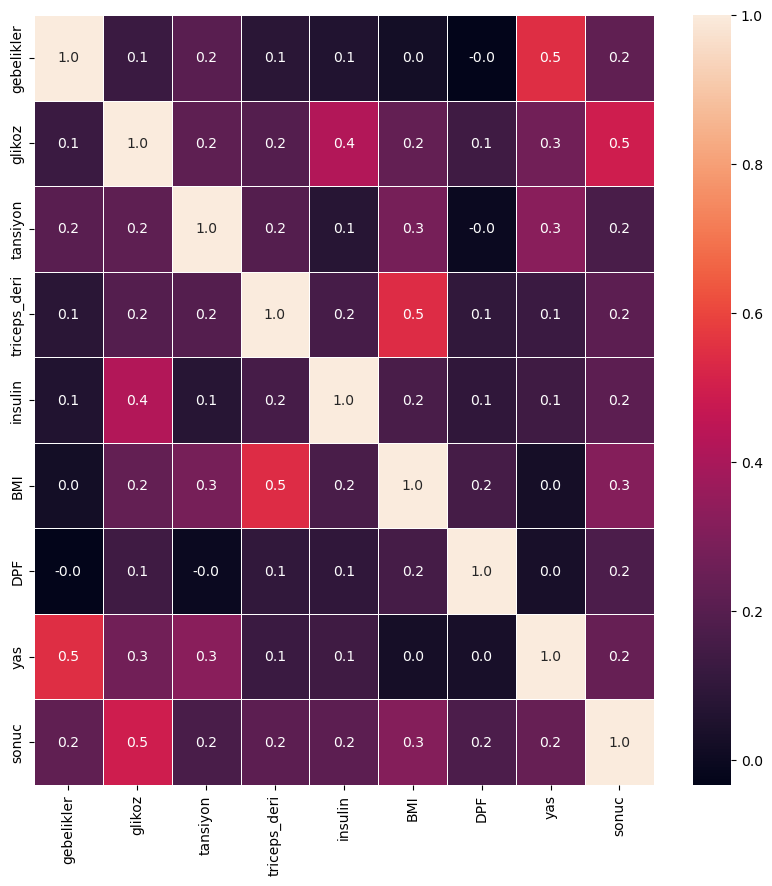

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f',linewidths=.7)
plt.show()
#Özellikler arasındaki ilişkinin ısı haritası ile gösterilmesi.
# annot ile değerleri hücrelere yazdırdık.

In [31]:
feature_names=df.corr().nlargest(4,'sonuc').index.tolist()
#Burada çıktı sınıfına göre korelasyonu en yüksek üç tane özelliği aldık.
#Bu üç özellik çıktı sınıfına daha çok etki etmiş demekki

In [32]:
df.corr().nlargest(4,'sonuc').index.tolist() 
# ilişkisi en yükek olanlar

['sonuc', 'glikoz', 'BMI', 'yas']

# Ayrık Değer Tespiti Öncesi Başarı Durumu

In [33]:
# outlier kısmıı
data=df.copy() 

In [34]:
data_x=data.drop(['sonuc'],axis=1)

In [35]:
data_y=data[["sonuc"]]

In [36]:
data_x.head()

gebelikler  glikoz  tansiyon  triceps_deri     insulin   BMI    DPF  yas
0           6   148.0      72.0      35.00000  155.548223  33.6  0.627   50
1           1    85.0      66.0      29.00000  155.548223  26.6  0.351   31
2           8   183.0      64.0      29.15342  155.548223  23.3  0.672   32
3           1    89.0      66.0      23.00000   94.000000  28.1  0.167   21
4           0   137.0      40.0      35.00000  168.000000  43.1  2.288   33

In [37]:
data_y.head()

sonuc
0      1
1      0
2      1
3      0
4      1

# Ölçekleme

In [38]:
scaler=StandardScaler()
scaler
data_x[numeric_list[:-1]] = scaled_array=scaler.fit_transform(data_x[numeric_list[:-1]])
data_x.head()

gebelikler    glikoz  tansiyon  triceps_deri       insulin       BMI  \
0    0.639947  0.865108 -0.033518  6.655021e-01 -3.345079e-16  0.166292   
1   -0.844885 -1.206162 -0.529859 -1.746338e-02 -3.345079e-16 -0.852531   
2    1.233880  2.015813 -0.695306  8.087936e-16 -3.345079e-16 -1.332833   
3   -0.844885 -1.074652 -0.529859 -7.004289e-01 -7.243887e-01 -0.634212   
4   -1.141852  0.503458 -2.680669  6.655021e-01  1.465506e-01  1.548980   

        DPF       yas  
0  0.468492  1.425995  
1 -0.365061 -0.190672  
2  0.604397 -0.105584  
3 -0.920763 -1.041549  
4  5.484909 -0.020496

## Eğitim Test Ayrımı

In [39]:
data_x_train,data_x_test,data_y_train,data_y_test=train_test_split(data_x,data_y,test_size=0.3,random_state=3)

In [40]:
log_model_deneme = LogisticRegression()
log_model_deneme.fit(data_x_train, data_y_train)
y_pred_deneme = log_model_deneme.predict(data_x_test)
y_pred_prob_deneme = log_model_deneme.predict_proba(data_x_test)
y_pred_prob_deneme

array([[0.9408187 , 0.0591813 ],
       [0.14579904, 0.85420096],
       [0.9600986 , 0.0399014 ],
       [0.17550055, 0.82449945],
       [0.62580514, 0.37419486],
       [0.51713808, 0.48286192],
       [0.91320471, 0.08679529],
       [0.99050854, 0.00949146],
       [0.77577786, 0.22422214],
       [0.79936378, 0.20063622],
       [0.68914205, 0.31085795],
       [0.72766618, 0.27233382],
       [0.81666348, 0.18333652],
       [0.16687644, 0.83312356],
       [0.28549211, 0.71450789],
       [0.97211497, 0.02788503],
       [0.93604235, 0.06395765],
       [0.9818263 , 0.0181737 ],
       [0.45806033, 0.54193967],
       [0.55036561, 0.44963439],
       [0.88192181, 0.11807819],
       [0.9488473 , 0.0511527 ],
       [0.79408928, 0.20591072],
       [0.58658709, 0.41341291],
       [0.95386852, 0.04613148],
       [0.13101706, 0.86898294],
       [0.79098454, 0.20901546],
       [0.87965391, 0.12034609],
       [0.67685796, 0.32314204],
       [0.80238311, 0.19761689],
       [0.

In [41]:
y_pred_deneme=np.argmax(y_pred_prob_deneme, axis=1)
y_pred_deneme
lr_acc_deneme=accuracy_score(data_y_test,y_pred_deneme)
lr_acc_deneme

0.7359307359307359

## 3.9. Ayrık Değer Tespiti(Outlier Detection) <a id='9'></a>

![indir](./images/indir.png)

In [42]:
numeric_list=["gebelikler","glikoz","tansiyon","triceps_deri","insulin","BMI","DPF","yas"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

gebelikler  glikoz  tansiyon  triceps_deri     insulin   BMI    DPF  yas
0           6   148.0      72.0      35.00000  155.548223  33.6  0.627   50
1           1    85.0      66.0      29.00000  155.548223  26.6  0.351   31
2           8   183.0      64.0      29.15342  155.548223  23.3  0.672   32
3           1    89.0      66.0      23.00000   94.000000  28.1  0.167   21
4           0   137.0      40.0      35.00000  168.000000  43.1  2.288   33

In [43]:
df.describe()

gebelikler      glikoz    tansiyon  triceps_deri     insulin  \
count  768.000000  768.000000  768.000000    768.000000  768.000000   
mean     3.845052  121.686763   72.405184     29.153420  155.548223   
std      3.369578   30.435949   12.096346      8.790942   85.021108   
min      0.000000   44.000000   24.000000      7.000000   14.000000   
25%      1.000000   99.750000   64.000000     25.000000  121.500000   
50%      3.000000  117.000000   72.202592     29.153420  155.548223   
75%      6.000000  140.250000   80.000000     32.000000  155.548223   
max     17.000000  199.000000  122.000000     99.000000  846.000000   

              BMI         DPF         yas       sonuc  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.457464    0.471876   33.240885    0.348958  
std      6.875151    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.000000    0.000000  
50%     32.400000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [44]:
for i in numeric_list:
    Q1=np.percentile(df.loc[:,i],25)# %25 olan kısım
    Q3=np.percentile(df.loc[:,i],75)# %75 olan kısım
    IQR=Q3-Q1
    print("Old Shape: ",df.loc[:,i].shape)
    upper=np.where(df.loc[:,i]>=(Q3+1.5*IQR))
    lower=np.where(df.loc[:,i]<=(Q1-1.5*IQR))
    print("{}--{}".format(upper,lower))
    
    try:
        df.drop(upper[0],inplace=True)
    except:
        print("KeyError: {} not found in axis".format(upper[0]))
    try:
        df.drop(lower[0],inplace=True)
    except:
        print("KeyError. {} not found in axis".format(lower[0]))
        
    print("New Shape: ",df.shape)

Old Shape:  (768,)
(array([ 88, 159, 298, 455], dtype=int64),)--(array([], dtype=int64),)
New Shape:  (764, 9)
Old Shape:  (764,)
(array([], dtype=int64),)--(array([], dtype=int64),)
New Shape:  (764, 9)
Old Shape:  (764,)
(array([ 43,  84, 105, 175, 205, 359, 437, 545, 654, 658, 668, 687],
      dtype=int64),)--(array([  4,  18, 124, 593, 595], dtype=int64),)
New Shape:  (747, 9)
Old Shape:  (747,)
(array([  7,  15,  37,  54,  82,  94, 114, 143, 148, 168, 182, 189, 201,
       263, 265, 276, 279, 283, 324, 358, 362, 363, 397, 410, 416, 432,
       434, 444, 462, 518, 525, 533, 560, 564, 565, 576, 578, 608, 639,
       642, 643, 644, 646, 668, 672, 697, 732, 742], dtype=int64),)--(array([ 30,  47,  52,  65,  77, 123, 127, 161, 188, 242, 244, 269, 296,
       302, 305, 309, 329, 342, 370, 373, 380, 381, 420, 422, 431, 433,
       437, 451, 452, 505, 550, 570, 592, 600, 622, 651, 677, 689],
      dtype=int64),)
KeyError: [  7  15  37  54  82  94 114 143 148 168 182 189 201 263 265 276 27

# 4.Modelleme<a id='d'></a>
   1. [Ölçekleme(Scalling)](#4.1)
   2. [Eğitim/Test Ayrımı(Train/Test Split)](#4.2)
   3. [Logistic Regression](#4.3)
   4. [Confusion Matrix](#4.4)
   5. [Roc Curve Analizi](#4.5)
   6. [Gaussian Naive Bayes](#4.6)
   7. [KNN](#4.7)
   8. [SVC](#4.8)
   9. [Yapay Sinir Ağları](#4.9) 
   10. [Random Forest Algoritması ve Özellik Seçimi](#4.10)
   11. [Random Forest  Ağaç Yapısı Görselleştirmesi](#4.11)
   12. [Etkin Özelliğe Göre Sınıflandırma](#4.12)
   13. [Tüm Modellerin Karşılaştırılması](#4.13)   
   14. [Algoritmaların Çalışma Zamanı Karşılaştırılması](#4.14)   

In [45]:
df1=df.copy()

In [46]:
df1

gebelikler  glikoz  tansiyon  triceps_deri     insulin   BMI    DPF  yas  \
0             6   148.0      72.0      35.00000  155.548223  33.6  0.627   50   
1             1    85.0      66.0      29.00000  155.548223  26.6  0.351   31   
2             8   183.0      64.0      29.15342  155.548223  23.3  0.672   32   
3             1    89.0      66.0      23.00000   94.000000  28.1  0.167   21   
5             5   116.0      74.0      29.15342  155.548223  25.6  0.201   30   
..          ...     ...       ...           ...         ...   ...    ...  ...   
763          10   101.0      76.0      48.00000  180.000000  32.9  0.171   63   
764           2   122.0      70.0      27.00000  155.548223  36.8  0.340   27   
765           5   121.0      72.0      23.00000  112.000000  26.2  0.245   30   
766           1   126.0      60.0      29.15342  155.548223  30.1  0.349   47   
767           1    93.0      70.0      31.00000  155.548223  30.4  0.315   23   

     sonuc  
0        1  
1        0  
2        1  
3        0  
5        0  
..     ...  
763      0  
764      0  
765      0  
766      1  
767      0  

[671 rows x 9 columns]

In [47]:
x=df1.drop(['sonuc'],axis=1)

In [48]:
y=df1[["sonuc"]]

In [49]:
x.head()

gebelikler  glikoz  tansiyon  triceps_deri     insulin   BMI    DPF  yas
0           6   148.0      72.0      35.00000  155.548223  33.6  0.627   50
1           1    85.0      66.0      29.00000  155.548223  26.6  0.351   31
2           8   183.0      64.0      29.15342  155.548223  23.3  0.672   32
3           1    89.0      66.0      23.00000   94.000000  28.1  0.167   21
5           5   116.0      74.0      29.15342  155.548223  25.6  0.201   30

In [50]:
y.head()

sonuc
0      1
1      0
2      1
3      0
5      0

## 4.1. Ölçekleme(Scalling)<a id='4.1'></a>

In [51]:
scaler=StandardScaler()
scaler

StandardScaler()

In [52]:
x[numeric_list[:-1]] = scaled_array=scaler.fit_transform(x[numeric_list[:-1]])

In [53]:
x.head()

gebelikler    glikoz  tansiyon  triceps_deri   insulin       BMI       DPF  \
0    0.677082  0.867849 -0.026275      0.679097 -0.019361  0.185998  0.500561   
1   -0.865084 -1.189467 -0.535457     -0.000882 -0.019361 -0.834858 -0.368264   
2    1.293949  2.010802 -0.705185      0.016505 -0.019361 -1.316118  0.642217   
3   -0.865084 -1.058843 -0.535457     -0.680862 -0.714366 -0.616103 -0.947481   
5    0.368649 -0.177137  0.143453      0.016505 -0.019361 -0.980694 -0.840452   

   yas  
0   50  
1   31  
2   32  
3   21  
5   30

## 4.2.Eğitim/Test Ayrımı (Train/Test Split)<a id='4.2'></a>

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [55]:
print("X_train: {}".format(x_train.shape))

X_train: (469, 8)


In [56]:
print("X_test: {}".format(x_test.shape))

X_test: (202, 8)


In [57]:
print("y_train: {}".format(y_train.shape))

y_train: (469, 1)


In [58]:
print("y_test: {}".format(y_test.shape)) 

y_test: (202, 1)


In [59]:
x_train

gebelikler    glikoz  tansiyon  triceps_deri   insulin       BMI  \
61     1.293949  0.378012 -0.026275      0.016505 -0.019361  0.083912   
318   -0.248218 -0.209793 -0.535457      1.132417 -0.194932  0.842262   
722   -0.865084  0.900505 -0.365730     -0.000882 -0.341729 -0.441099   
423   -0.556651 -0.209793 -0.705185     -0.794192 -0.019361 -0.222345   
282    0.985516  0.378012  1.331545     -1.587502 -0.025552  0.010994   
..          ...       ...       ...           ...       ...       ...   
756    0.985516  0.508635  1.501272      1.359077 -0.019361 -0.047341   
301   -0.556651  0.737226 -1.214367      0.452438 -0.251393 -0.105675   
740    2.219249 -0.046514  0.652635      0.905757 -0.082012  1.454775   
293   -0.865084  0.214733 -2.063005      1.812397  0.414837  1.192269   
761    1.602382  1.586276  0.143453      0.225778 -0.019361  1.702697   

          DPF  yas  
61  -0.623246   39  
318 -1.000996   28  
722 -0.374560   42  
423 -0.147910   21  
282 -0.648429   37  
..        ...  ...  
756 -0.242347   39  
301 -0.144762   25  
740  0.997932   48  
293  0.456490   24  
761 -0.204572   43  

[469 rows x 8 columns]

In [60]:
x_test

gebelikler    glikoz  tansiyon  triceps_deri   insulin       BMI  \
543    0.060216 -1.222122  1.501272     -0.680862 -1.143463  1.046433   
625    0.060216 -1.026188  1.331545      2.039057 -1.166047  0.783927   
475   -1.173517  0.508635  0.992090     -0.227542 -0.019361 -0.732772   
252   -0.556651 -1.026188  0.652635     -1.700832 -1.154755 -1.155698   
763    1.910815 -0.666974  0.313180      2.152387  0.256749  0.083912   
..          ...       ...       ...           ...       ...       ...   
618    1.602382 -0.307760  0.822363     -0.567532 -0.019361 -0.601519   
253   -1.173517 -1.156811 -0.365730      0.339108 -0.019361  0.506838   
681   -1.173517  1.325030  0.313180      0.792427 -0.019361  2.519381   
290   -1.173517 -1.418057  1.331545     -0.000882 -1.324135  0.667258   
453   -0.556651 -0.079169  0.008111      0.016505 -0.019361 -1.855713   

          DPF  yas  
543 -0.972664   25  
625 -0.333637   29  
475 -0.746014   59  
252 -0.689352   24  
763 -0.934889   63  
..        ...  ...  
618  2.562447   50  
253 -0.723979   25  
681 -0.327341   26  
290 -0.106987   21  
453  1.145884   72  

[202 rows x 8 columns]

In [61]:
y_train

sonuc
61       1
318      0
722      1
423      0
282      0
..     ...
756      0
301      1
740      1
293      1
761      1

[469 rows x 1 columns]

In [62]:
y_test

sonuc
543      0
625      0
475      0
252      0
763      0
..     ...
618      1
253      0
681      1
290      0
453      0

[202 rows x 1 columns]

## 4.3.Logistic Regression<a id='4.3'></a>

### Logistic Regression Nedir ?
![logistic](./images/logistic.jpeg)

* Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır. İkili sınıflandırma problemlerinde genellikle kullanılır.


In [63]:
df1

gebelikler  glikoz  tansiyon  triceps_deri     insulin   BMI    DPF  yas  \
0             6   148.0      72.0      35.00000  155.548223  33.6  0.627   50   
1             1    85.0      66.0      29.00000  155.548223  26.6  0.351   31   
2             8   183.0      64.0      29.15342  155.548223  23.3  0.672   32   
3             1    89.0      66.0      23.00000   94.000000  28.1  0.167   21   
5             5   116.0      74.0      29.15342  155.548223  25.6  0.201   30   
..          ...     ...       ...           ...         ...   ...    ...  ...   
763          10   101.0      76.0      48.00000  180.000000  32.9  0.171   63   
764           2   122.0      70.0      27.00000  155.548223  36.8  0.340   27   
765           5   121.0      72.0      23.00000  112.000000  26.2  0.245   30   
766           1   126.0      60.0      29.15342  155.548223  30.1  0.349   47   
767           1    93.0      70.0      31.00000  155.548223  30.4  0.315   23   

     sonuc  
0        1  
1        0  
2        1  
3        0  
5        0  
..     ...  
763      0  
764      0  
765      0  
766      1  
767      0  

[671 rows x 9 columns]

In [64]:
df1["sonuc"].value_counts()

0    441
1    230
Name: sonuc, dtype: int64

<AxesSubplot:>

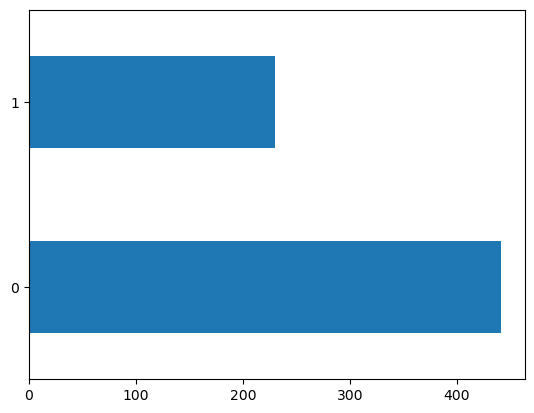

In [65]:
df1["sonuc"].value_counts().plot.barh()#çıktı sınıfının görselleştirilmesi

In [66]:
log_model = LogisticRegression()

In [67]:
lr0=time()
log_model.fit(x_train, y_train)
lr_time=time()-lr0
y_pred_log = log_model.predict(x_test)

In [68]:
y_pred_prob_log = log_model.predict_proba(x_test)
y_pred_prob_log

array([[0.88643536, 0.11356464],
       [0.78728283, 0.21271717],
       [0.71806632, 0.28193368],
       [0.96592182, 0.03407818],
       [0.59360284, 0.40639716],
       [0.67865034, 0.32134966],
       [0.22610921, 0.77389079],
       [0.14609812, 0.85390188],
       [0.53237556, 0.46762444],
       [0.89772417, 0.10227583],
       [0.91516681, 0.08483319],
       [0.67876871, 0.32123129],
       [0.68448061, 0.31551939],
       [0.62332863, 0.37667137],
       [0.93045554, 0.06954446],
       [0.1634838 , 0.8365162 ],
       [0.25266243, 0.74733757],
       [0.06613253, 0.93386747],
       [0.90643331, 0.09356669],
       [0.67578678, 0.32421322],
       [0.92548775, 0.07451225],
       [0.78057804, 0.21942196],
       [0.5565379 , 0.4434621 ],
       [0.63246388, 0.36753612],
       [0.5487923 , 0.4512077 ],
       [0.93455887, 0.06544113],
       [0.95570835, 0.04429165],
       [0.81870256, 0.18129744],
       [0.74564696, 0.25435304],
       [0.92073808, 0.07926192],
       [0.

In [69]:
y_pred_log=np.argmax(y_pred_prob_log, axis=1)

In [70]:
y_pred_log

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [71]:
lr_acc=accuracy_score(y_test,y_pred_log)
lr_acc

0.8217821782178217

In [72]:
log_model.coef_

array([[ 0.31926936,  1.11972832, -0.05050203,  0.16670532, -0.04877384,
         0.56325242,  0.24338924,  0.01401116]])

## 4.4. Confusion Matrix<a id='4.4'></a>

![confusion](./images/confusion.png)

![confusion](./images/confusion2.png)

In [73]:
confusion_matrix(y_true=y_test,y_pred=y_pred_log)

array([[122,  17],
       [ 19,  44]], dtype=int64)

In [74]:
accuracy_score(y_true=y_test,y_pred=y_pred_log)

0.8217821782178217

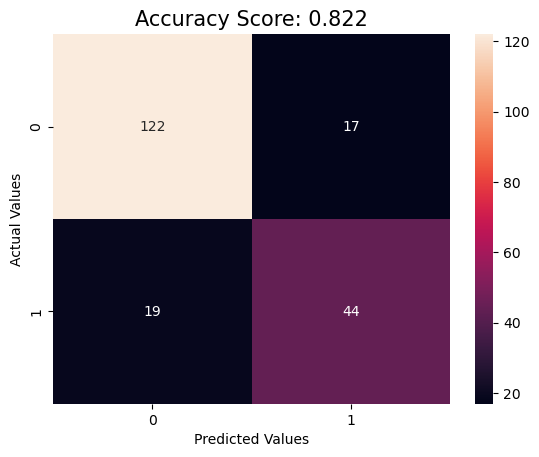

In [75]:
predictions = log_model.predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = confusion_matrix(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       139
           1       0.72      0.70      0.71        63

    accuracy                           0.82       202
   macro avg       0.79      0.79      0.79       202
weighted avg       0.82      0.82      0.82       202



* **Accuracy** = Doğru Tahminlerin Sayısı / Tüm Tahminlerin Sayısı

* **Precision** = Pozitif olarak tahmin edilenlerin gerçekte kaçta kaçı doğru.
* **Precision** = TP /(TP+FP)

* **Recall** = Model, pozitif classların kaçta kaçını yakalayabiliyor.
* **Recall** = TP / (TP+FN)

* **F1 Score**,Precision ve Recall değerlerinin ağırlıklı (harmonik) ortalamasıdır.
* **F1 Score** = 2 * (Recall * Precision) / (Recall+ Precision)


## 4.5.ROC Curve Analizi  <a id='4.5'></a>

In [77]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_log[:,1])

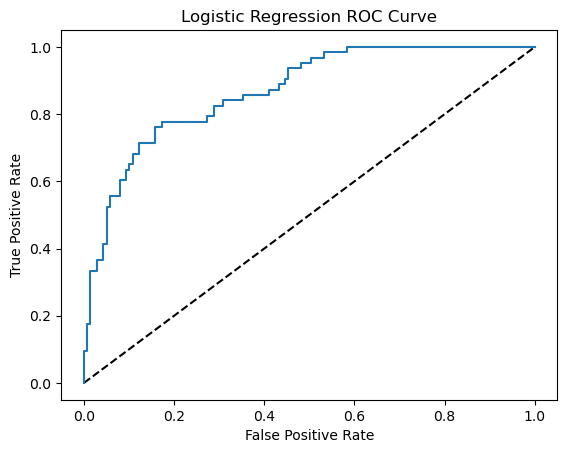

In [78]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## 4.6. Gaussian Naive Bayes<a id='4.6'></a>

### Gaussian Navie Bayes Nedir ?
![naive-bayes](./images/naive.jpg)
* Olasılık temelli bir modelleme tekniğidir. Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır. Çok kategorik sınıf bulunduran veri setlerinde kullanımı oldukça yaygındır.

In [79]:
df1

gebelikler  glikoz  tansiyon  triceps_deri     insulin   BMI    DPF  yas  \
0             6   148.0      72.0      35.00000  155.548223  33.6  0.627   50   
1             1    85.0      66.0      29.00000  155.548223  26.6  0.351   31   
2             8   183.0      64.0      29.15342  155.548223  23.3  0.672   32   
3             1    89.0      66.0      23.00000   94.000000  28.1  0.167   21   
5             5   116.0      74.0      29.15342  155.548223  25.6  0.201   30   
..          ...     ...       ...           ...         ...   ...    ...  ...   
763          10   101.0      76.0      48.00000  180.000000  32.9  0.171   63   
764           2   122.0      70.0      27.00000  155.548223  36.8  0.340   27   
765           5   121.0      72.0      23.00000  112.000000  26.2  0.245   30   
766           1   126.0      60.0      29.15342  155.548223  30.1  0.349   47   
767           1    93.0      70.0      31.00000  155.548223  30.4  0.315   23   

     sonuc  
0        1  
1        0  
2        1  
3        0  
5        0  
..     ...  
763      0  
764      0  
765      0  
766      1  
767      0  

[671 rows x 9 columns]

In [80]:
nb = GaussianNB()
nb0=time()
nb_model = nb.fit(x_train,y_train)
nb_time=time()-nb0
nb_model

GaussianNB()

In [81]:
nb_model.predict(x_test)[0:10] #tahmin değerleri

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [82]:
nb_model.predict_proba(x_test)[0:10] #olasılık değerleri

array([[0.92047573, 0.07952427],
       [0.66403913, 0.33596087],
       [0.70834613, 0.29165387],
       [0.99351109, 0.00648891],
       [0.20588148, 0.79411852],
       [0.79616107, 0.20383893],
       [0.00996497, 0.99003503],
       [0.0495612 , 0.9504388 ],
       [0.61604508, 0.38395492],
       [0.96694601, 0.03305399]])

In [83]:
y_pred_nb = nb_model.predict(x_test) #test hatasını hesapladık

In [84]:
nb_acc = accuracy_score(y_test, y_pred_nb)
nb_acc

0.7871287128712872

In [85]:
nb_acc_CV=cross_val_score(nb_model,x_test,y_test, cv = 10).mean()# test hatasının doğrulanmış hali
nb_acc_CV

0.7571428571428571

## 4.7. KNN <a id='4.7'></a>

### KNN Nedir ?
![Knn](./images/Knn.png)
* Tahminler gözlem değerlerine göre yapılır. Gözlem değerlerinin yani bağımsız değişkenlerin bağımlı değişkene yani çıktı sınıfına  olan uzaklıkları hesaplanır bu uzaklık hesaplamaları öklid vb. olabilir.Mesela veri setimize yeni bir gözlem değeri gelsin. Bu gözlem değerinin En yakın K adet gözlem değeri bulunur bu K sayısı 3,5,7 gibi kat sayılar olabilir. Seçilen en yakın olan gözlem değerlerinin çıktı sınıfları en fazla olan hangisi ise yeni gelen gözlem değeri o sınıfa ait olur.

In [86]:
knn = KNeighborsClassifier()
knn0=time()
knn_model = knn.fit(x_train,y_train)
knn_time=time()-knn0
knn_model

KNeighborsClassifier()

In [87]:
y_pred_knn = knn_model.predict(x_test)

In [88]:
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_acc

0.7475247524752475

In [89]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       139
           1       0.60      0.56      0.58        63

    accuracy                           0.75       202
   macro avg       0.70      0.70      0.70       202
weighted avg       0.74      0.75      0.74       202



## KNN Model Tuning

In [90]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [91]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [92]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.7272895467160037
En iyi parametreler: {'n_neighbors': 17}


In [93]:
knn = KNeighborsClassifier(17)
knntuned0=time()
knn_tuned = knn.fit(x_train,y_train)
knn_tuned_time=time()-knntuned0

In [94]:
knn_tuned.score(x_test,y_test)

0.7772277227722773

In [95]:
y_pred_knn = knn_tuned.predict(x_test)

In [96]:
knn_tuned_acc=accuracy_score(y_test,y_pred_knn)
knn_tuned_acc

0.7772277227722773

## 4.8. SVC <a id='4.8'></a>

### SVC(Support Vector Classifier- Destek Vektör Sınıflandırması) Nedir ?
![svm.png](./images/svm.png)
* Amaç iki sınıf arasındanki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır. Regresyonda öyle bir düzlem bulunmalıki değişkenlerin en az hata ile maksimum noktayı yani değişkenleri bulmalıydı ama SVM'de tam tersi diyebiliriz öyle bir düzlem olmalıki mümkün olduğunca az gözlem değeri olmalı yani ayrıştırmasını sağlayacak özetle marginin maksimum olmasını sağlamalı. SVM önce sınıflandırma problemleri için ortaya çıkmıştır daha sonra ise regresyon problemlerinde de kullanılmıştır. Support kelimesi ise marginin maksimum olması için belirlenen noktalardır yani verilerdir. 
* Küçük ve orta büyüklükteki veriler için uygundur. 
* Hard ve Soft margin kavramları vardır. Örneklerimiz margin bölgesine girerse Soft margin denir. Hard margin ise verimiz doğrusal olarak ayrılabiliyorsa çalışır ve aykırı değerlere karşı çok duyarlıdır.
![marginpng](./images/margin.png)
* Bir de kernel çeşitleri vardır ayrıştırma işlemlerinde kullanılırlar.

In [97]:
svm0=time()
svm_model = SVC(kernel = "linear").fit(x_train,y_train)
svm_time=time()-svm0

In [98]:
svm_model

SVC(kernel='linear')

In [99]:
y_pred_svm = svm_model.predict(x_test)

In [100]:
svm_acc=accuracy_score(y_test,y_pred_svm)
svm_acc

0.8267326732673267

## SVM Model Tuning

In [101]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svmtuned0=time()
svc_cv_model.fit(x_train,y_train)
svm_tuned_time=time()-svmtuned0

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [102]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 4}


In [103]:
svc_tuned = SVC(kernel = "linear", C = 4).fit(x_train, y_train)

In [104]:
y_pred_svm_tuned = svc_tuned.predict(x_test)
svm_tuned_acc=accuracy_score(y_test, y_pred_svm_tuned)
svm_tuned_acc

0.8267326732673267

## 4.9. Yapay Sinir Ağları(Artificial Neural Network) <a id='4.9'></a>

### Yapay Sinir Ağları Nedir ?
![ysapng](./images/ysa.png)
* İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli  makine öğrenmesi algoritmalarından birisidir.
* 

In [105]:
scaler = StandardScaler()

In [106]:
scaler.fit(x_train)
ysa_x_train_scaled = scaler.transform(x_train)
ysa_x_test_scaled = scaler.transform(x_test)

In [107]:
ysa_x_test_scaled[0:5]

array([[ 0.06762497, -1.23338271,  1.60613286, -0.68076277, -1.18496082,
         1.05804556, -0.97850035, -0.70662106],
       [ 0.06762497, -1.03393498,  1.42892642,  2.07649196, -1.20849597,
         0.79281589, -0.34743709, -0.35518386],
       [-1.16406866,  0.52840557,  1.07451353, -0.22122031, -0.01351922,
        -0.73962216, -0.75467496,  2.28059511],
       [-0.54822184, -1.03393498,  0.72010064, -1.71473329, -1.1967284 ,
        -1.16693662, -0.69871861, -0.79448036],
       [ 1.91516541, -0.66828081,  0.36568775,  2.19137757,  0.27421899,
         0.08553679, -0.94119612,  2.63203231]])

In [108]:
ysa0=time()
mlpc = MLPClassifier().fit(ysa_x_train_scaled, y_train)
ysa_time=time()-ysa0

In [109]:
y_pred_ysa = mlpc.predict(ysa_x_test_scaled)
ysa_acc=accuracy_score(y_test, y_pred_ysa)
ysa_acc

0.806930693069307

## YSA Model Tuning

In [110]:
mlpc

MLPClassifier()

In [111]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [112]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)
ysatuned0=time()
mlpc_cv_model.fit(ysa_x_train_scaled, y_train)
ysa_tuned_time=time()-ysatuned0

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [113]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [114]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [115]:

mlpc_tuned.fit(ysa_x_train_scaled, y_train)


MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [116]:
y_pred_ysa = mlpc_tuned.predict(ysa_x_test_scaled)
ysa_tuned_acc=accuracy_score(y_test, y_pred_ysa)
ysa_tuned_acc

0.806930693069307

## 4.10. Random Forest Algoritması ve Özellik Seçimi<a id='4.10'></a>

In [117]:
rf0=time()
rf_model=RandomForestClassifier().fit(x_train,y_train)
rf_time=time()-rf0

In [118]:
rf_model

RandomForestClassifier()

In [119]:
y_pred_rf=rf_model.predict(x_test)

In [120]:
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_acc

0.7920792079207921

In [121]:
rf_params={"max_depth":[2,5,8,10],
           "max_features":[2,5,8],   
           "n_estimators":[10,500,1000],
           "min_samples_split":[2,5,10]
          }

In [122]:
rf_model=RandomForestClassifier()

In [123]:
rf_cv_model=GridSearchCV(rf_model,
                         rf_params,
                         cv=10,
                         n_jobs=-1,
                         verbose=2
                        )

In [124]:

rf_cv_model.fit(x_train,y_train)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [125]:
print("En İyi Parametreler:"+str(rf_cv_model.best_params_))

En İyi Parametreler:{'max_depth': 2, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [126]:
rf_tuned=RandomForestClassifier(max_depth=3,
                                max_features=5,
                                min_samples_split=10,
                                n_estimators=500
                               )

In [127]:
rf_tuned0=time()
rf_tuned.fit(x_train,y_train)
rf_tuned_time=time()-rf_tuned0

In [128]:
y_pred_rf=rf_tuned.predict(x_test)
rf_tuned_acc=accuracy_score(y_test,y_pred_rf)
rf_tuned_acc

0.7772277227722773

## 4.11. Random Forest  Ağaç Yapısı Görselleştirmesi <a id='4.11'></a>

In [129]:
d_tree99 = rf_tuned.estimators_[99]
dot_data = StringIO()
export_graphviz(d_tree99, feature_names = x.columns,
               out_file = dot_data, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x0c\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xa7;f\x8…

In [130]:
Importance = pd.DataFrame({"Önem": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

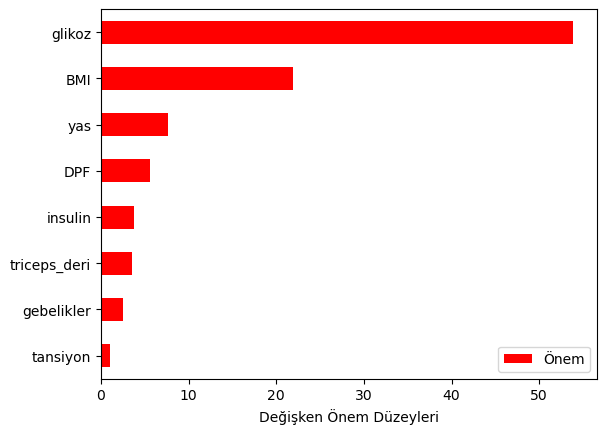

In [131]:
Importance.sort_values(by = "Önem", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## 4.12. Etkin Özelliğe Göre Sınıflandırma <a id='4.12'></a>

In [132]:
data=pd.concat([x,df1.loc[:,"sonuc"]],axis=1)
data.head()

gebelikler    glikoz  tansiyon  triceps_deri   insulin       BMI       DPF  \
0    0.677082  0.867849 -0.026275      0.679097 -0.019361  0.185998  0.500561   
1   -0.865084 -1.189467 -0.535457     -0.000882 -0.019361 -0.834858 -0.368264   
2    1.293949  2.010802 -0.705185      0.016505 -0.019361 -1.316118  0.642217   
3   -0.865084 -1.058843 -0.535457     -0.680862 -0.714366 -0.616103 -0.947481   
5    0.368649 -0.177137  0.143453      0.016505 -0.019361 -0.980694 -0.840452   

   yas  sonuc  
0   50      1  
1   31      0  
2   32      1  
3   21      0  
5   30      0

In [133]:
data_x=data[["glikoz","BMI","yas","insulin"]]

In [134]:
data_x

glikoz       BMI  yas   insulin
0    0.867849  0.185998   50 -0.019361
1   -1.189467 -0.834858   31 -0.019361
2    2.010802 -1.316118   32 -0.019361
3   -1.058843 -0.616103   21 -0.714366
5   -0.177137 -0.980694   30 -0.019361
..        ...       ...  ...       ...
763 -0.666974  0.083912   63  0.256749
764  0.018798  0.652674   27 -0.019361
765 -0.013858 -0.893192   30 -0.511109
766  0.149421 -0.324430   47 -0.019361
767 -0.928220 -0.280679   23 -0.019361

[671 rows x 4 columns]

In [135]:
data_y=data[["sonuc"]]

In [136]:
data_y

sonuc
0        1
1        0
2        1
3        0
5        0
..     ...
763      0
764      0
765      0
766      1
767      0

[671 rows x 1 columns]

In [137]:
x_train_etkin,x_test_etkin,y_train_etkin,y_test_etkin=train_test_split(data_x,data_y,test_size=0.3,random_state=42)

In [138]:
logreg_rf = LogisticRegression()
logreg_rf.fit(x_train_etkin,y_train_etkin)

logisticReg_params = {"max_iter": [1,10,20,30,40,50,100],
                        "multi_class": ['auto', 'ovr', 'multinomial'],
                        "C":np.arange(1,10,1),
                     "solver":['liblinear', 'sag']}

logisticReg_model = GridSearchCV(logreg_rf, logisticReg_params, cv=10)
logisticReg_model.fit(x_train_etkin, y_train_etkin)
print("Best Parameter: ", logisticReg_model.best_params_)

Best Parameter:  {'C': 3, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'sag'}


In [139]:
logisticReg_tuned = LogisticRegression(C = 2, max_iter = 50, multi_class = 'multinomial', solver='sag')
logisticReg_tuned.fit(x_train_etkin, y_train_etkin)
y_pred_rf_tunded = logisticReg_tuned.predict(x_test_etkin)
y_pred_prob_rf = logreg_rf.predict_proba(x_test_etkin)
y_pred_rf=np.argmax(y_pred_prob_rf, axis=1)
print("Test accuracy: {}".format(accuracy_score(y_test_etkin,y_pred_rf)))

Test accuracy: 0.8415841584158416


## 4.13. Tüm Modellerin Karşılaştırılması <a id='4.13'></a>

In [140]:
modeller = [
    log_model,
    nb_model, 
    knn_tuned,
    svc_tuned,
    rf_tuned,
]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 82.1782%
----------------------------
GaussianNB:
Accuracy: 78.7129%
----------------------------
KNeighborsClassifier:
Accuracy: 77.7228%
----------------------------
SVC:
Accuracy: 82.6733%
----------------------------
RandomForestClassifier:
Accuracy: 77.7228%


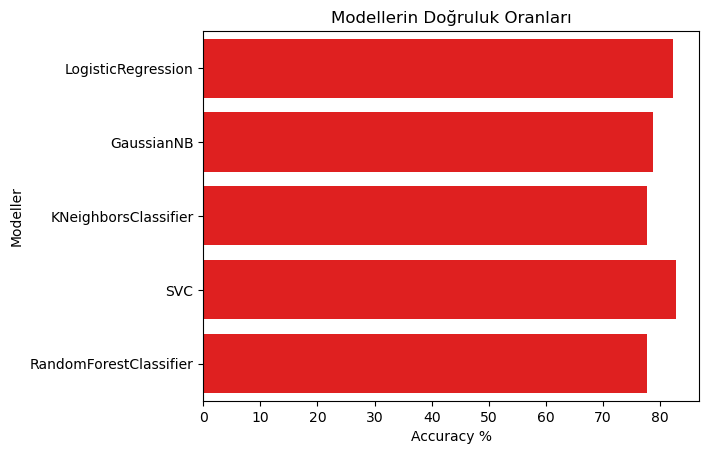

In [141]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');  

## 4.14. Algoritmaların Çalışma Zamanı Karşılaştırılması <a id='4.14'></a>

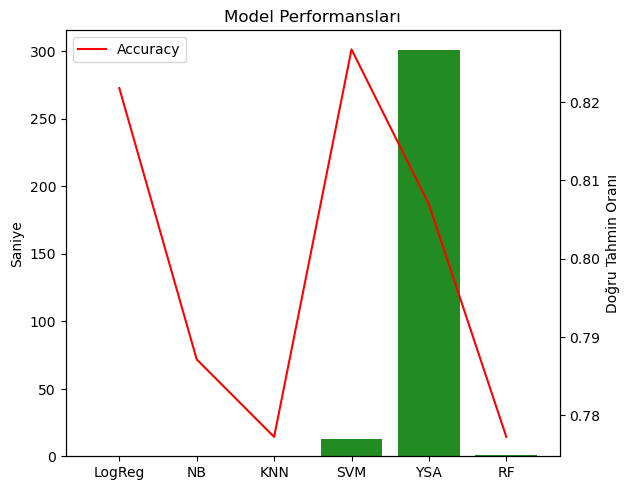

In [142]:
fig, ax1 = plt.subplots()
objects = ['LogReg', 'NB','KNN','SVM','YSA','RF',]
y_pos = np.arange(len(objects))
performance_time = [lr_time, nb_time,  knn_tuned_time, svm_tuned_time,ysa_tuned_time,rf_tuned_time]
performance_acc = [lr_acc, nb_acc, knn_tuned_acc,svm_tuned_acc,ysa_tuned_acc,rf_tuned_acc]
ax1.set_ylabel('Saniye')
ax1.bar(y_pos, performance_time, color='forestgreen')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Doğru Tahmin Oranı') 
ax2.plot(y_pos, performance_acc, color='red')
plt.xticks(y_pos, objects)
fig.tight_layout() 
plt.title('Model Performansları')
plt.legend(['Accuracy'], loc='upper left')
plt.show()